
# <u><center>BANK TELEMARKETING</center></u>

# Problem Statement
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.


# Data Information :Bank client data

Attribute Information:
Input variables:
* 1 - age (numeric)
* 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
* 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
* 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
* 5 - default: has credit in default? (categorical: 'no','yes','unknown')
* 6 - housing: has housing loan? (categorical: 'no','yes','unknown')
* 7 - loan: has personal loan? (categorical: 'no','yes','unknown') related with the last contact of the current campaign:
* 8 - contact: contact communication type (categorical: 'cellular','telephone')
* 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
* 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
* 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* 14 - previous: number of contacts performed before this campaign and for this client (numeric)
* 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') social and economic context attributes
* 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
* 17 - cons.price.idx: consumer price index - monthly indicator (numeric)
* 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
* 19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
* 20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
* 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



## Importing Libraries

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns  # for visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
sns.set()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.model_selection import cross_val_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# sklearn: library others are modules

## Importing the Data

In [14]:

df=pd.read_csv("/Bank (5).csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic,NaN,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,NaN,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Data Preprocessing

In [ ]:
df.shape

(41188, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

inference no of different var type.

In [11]:
df.describe(include='all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,40858,41108,39457,32591,40198,40198,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
unique,NaN,11,3,5,2,2,2,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,admin.,married,basic,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,10422,24928,12513,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,NaN
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000


In [10]:
df.describe(include='object')


,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188
unique,11,3,5,2,2,2,2,10,5,3
top,admin.,married,basic,no,yes,no,cellular,may,thu,nonexistent
freq,10422,24928,12513,32588,21576,33950,26144,13769,8623,35563


In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


 skewness , inference.
    

### Checking for unique categories in the features of object type :

In [ ]:
col=["job","marital","education","default","housing","loan","contact","month","day_of_week","poutcome"]
for i in col:
    print(i,": " ,df[i].unique())


job :  ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' nan 'student']
marital :  ['married' 'single' 'divorced' nan]
education :  ['basic' nan 'university.degree' 'high.school' 'professional.course'
 'illiterate']
default :  [nan 'no' 'yes']
housing :  ['yes' 'no' nan]
loan :  ['no' 'yes' nan]
contact :  ['cellular' 'telephone']
month :  ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']
day_of_week :  ['thu' 'fri' 'tue' 'mon' 'wed']
poutcome :  ['nonexistent' 'success' 'failure']


* **The Education column  has many categories and we need to reduce the categories for a better modelling.Let us group "basic.4y", "basic.9y" and "basic.6y" together and call them "basic".**

In [ ]:
df=df.replace(to_replace="basic.4y",value="basic")
df=df.replace(to_replace="basic.6y",value="basic")
df=df.replace(to_replace="basic.9y",value="basic")
df['education'].unique()

array(['basic', nan, 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

## Checking for  Missing Values
* Since there is a category unknown in the features job, marital,education,default,housing and loan ,we can infer that these values are the missing values in our data.Replacing 'unknown' with NaN.

In [ ]:
df= df.replace(to_replace="unknown",value=np.nan)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [ ]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp_var_rate         0
cons_price_idx       0
cons_conf_idx        0
euribor3m            0
nr_employed          0
y                    0
dtype: int64

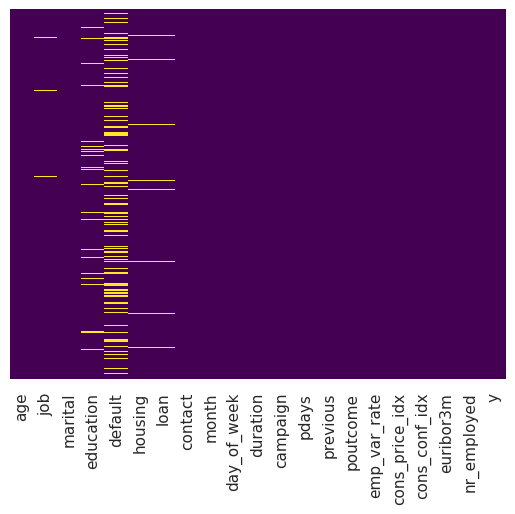

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [ ]:
#Finding the percentage of missing values in data set
df[["job","marital","education","default","housing","loan"]].isnull().sum()/df[["job","marital","education","default","housing","loan"]].shape[0]*100

job           0.801204
marital       0.194231
education     4.202680
default      20.872584
housing       2.403613
loan          2.403613
dtype: float64

* Since percent of missing values features job, marital,education,housing and loan are very low, we'll drop NA values of these features.
* default contains about 21% NAN values , so missing value treatment is required for this feature

In [ ]:
df.dropna(subset=['job', 'marital','education','housing','loan'],inplace=True)

In [ ]:
df['default'].value_counts()

default
no     30485
yes        3
Name: count, dtype: int64

Since almost all the values for default is no we'll replace the NAN values with no

In [ ]:
df['default'].fillna(value='no',inplace=True)

In [ ]:
df['default'].value_counts()

default
no     38242
yes        3
Name: count, dtype: int64

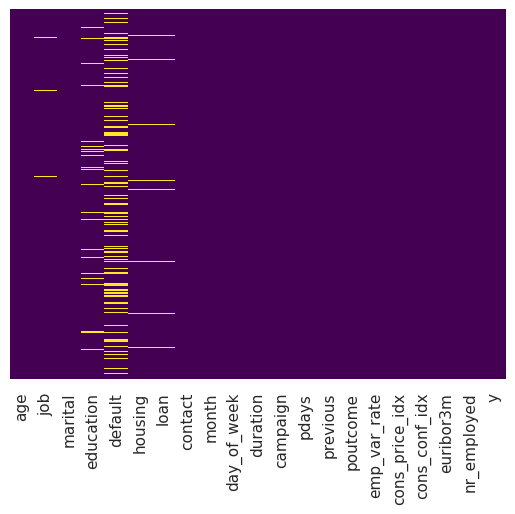

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

No missing values.

### Checking for duplicates

In [ ]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
6672,43,blue-collar,married,basic,no,yes,yes,cellular,may,tue,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,0
9216,33,admin.,married,university.degree,no,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,0
13336,49,blue-collar,married,basic,no,yes,no,cellular,may,fri,...,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1,0
17977,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
19339,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
22136,42,blue-collar,married,basic,no,yes,no,cellular,may,wed,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,0
24769,55,services,married,high.school,no,no,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
25634,39,blue-collar,married,basic,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
28143,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
29352,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


There are 16 duplicate rows. Dropping duplicate records

In [ ]:
df.drop_duplicates(ignore_index=True,inplace=True)
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38229 entries, 0 to 38228
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             38229 non-null  int64  
 1   job             38229 non-null  object 
 2   marital         38229 non-null  object 
 3   education       38229 non-null  object 
 4   default         38229 non-null  object 
 5   housing         38229 non-null  object 
 6   loan            38229 non-null  object 
 7   contact         38229 non-null  object 
 8   month           38229 non-null  object 
 9   day_of_week     38229 non-null  object 
 10  duration        38229 non-null  int64  
 11  campaign        38229 non-null  int64  
 12  pdays           38229 non-null  int64  
 13  previous        38229 non-null  int64  
 14  poutcome        38229 non-null  object 
 15  emp_var_rate    38229 non-null  float64
 16  cons_price_idx  38229 non-null  float64
 17  cons_conf_idx   38229 non-null 

Text(0.5, 1.0, 'nr_employed')

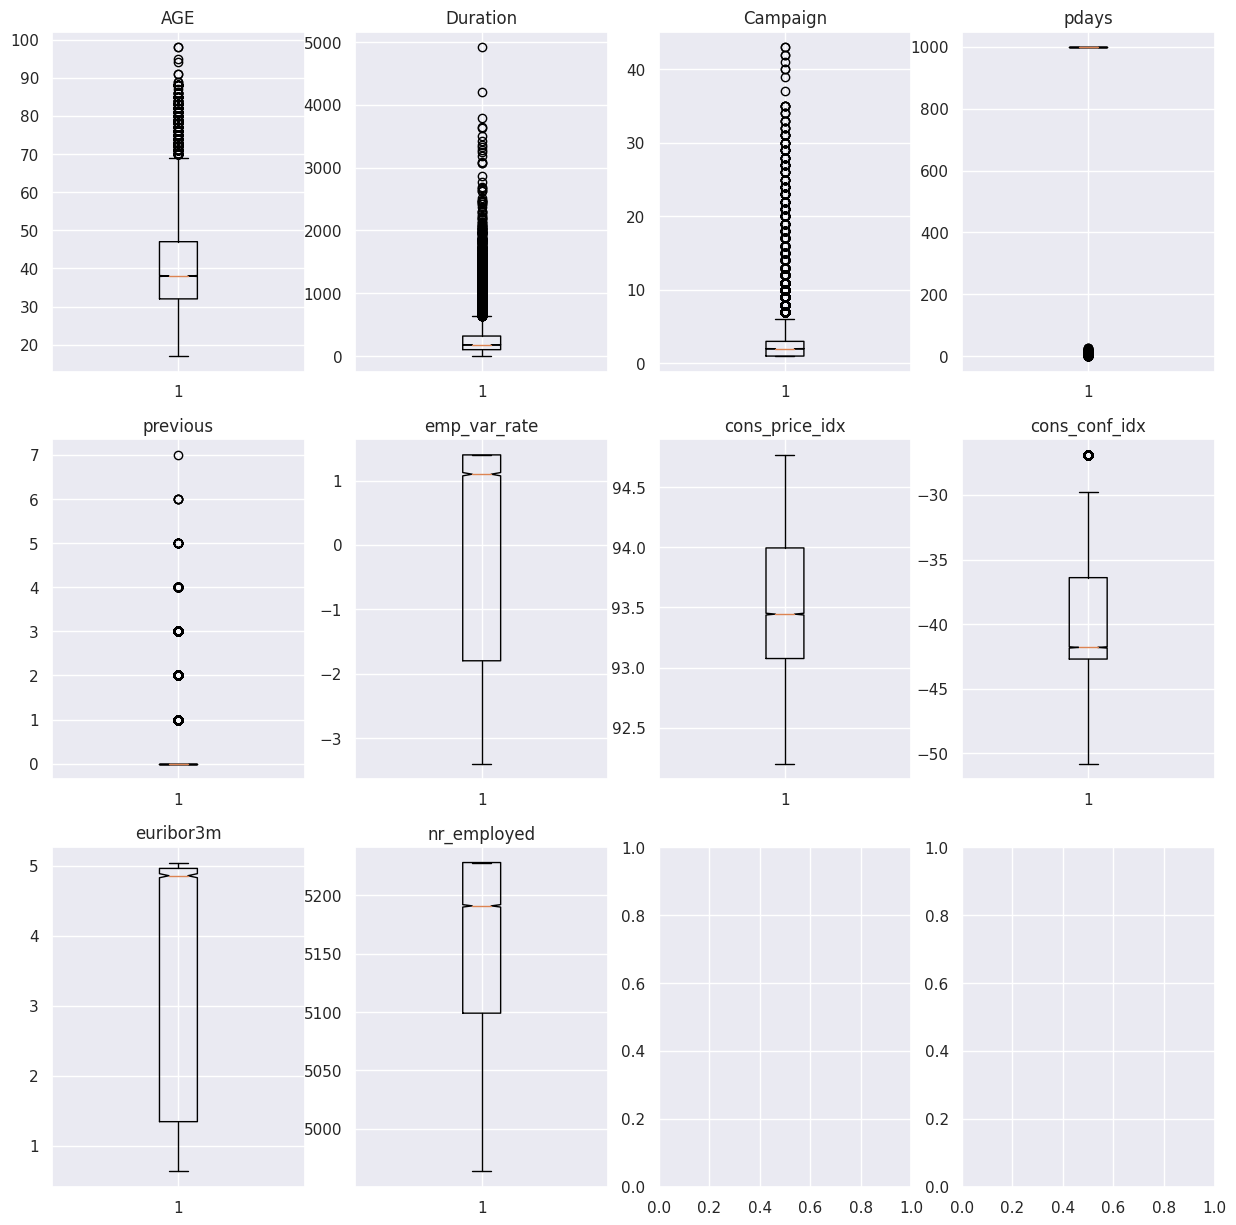

In [ ]:

fig, ax = plt.subplots(3,4,figsize=(15,15))  # 2=rows, 3=cols , figsize=figure size

ax[0, 0].boxplot(df.age, 'r') #row=0, col=0
ax[0, 1].boxplot(df.duration, 'b') #row=1, col=0
ax[0, 2].boxplot(df.campaign, 'g') #row=0, col=1
ax[0, 3].boxplot(df.pdays, 'k') #row=1, col=1
ax[1, 0].boxplot(df.previous, 'k') #row=1, col=2
ax[1, 1].boxplot(df.emp_var_rate, 'k') #row=1, col=2
ax[1, 2].boxplot(df.cons_price_idx, 'k') #row=1, col=2
ax[1, 3].boxplot(df.cons_conf_idx, 'k') #row=1, col=2
ax[2, 0].boxplot(df.euribor3m, 'k') #row=1, col=2
ax[2, 1].boxplot(df.nr_employed, 'k') #row=1, col=2

ax[0, 0].set_title("AGE")
ax[0, 1].set_title("Duration")
ax[0, 2].set_title("Campaign")
ax[0, 3].set_title("pdays")
ax[1, 0].set_title("previous")
ax[1, 1].set_title("emp_var_rate")
ax[1, 2].set_title("cons_price_idx")
ax[1, 3].set_title("cons_conf_idx")
ax[2, 0].set_title("euribor3m")
ax[2, 1].set_title("nr_employed")
#plt.show()

In [ ]:
df["pdays"].value_counts()

pdays
999    36863
3        393
6        379
4        106
2         57
9         55
12        53
7         52
5         45
10        44
13        33
11        26
1         24
15        22
14        18
0         15
8         14
16         8
17         6
18         5
22         3
19         3
21         2
26         1
25         1
27         1
Name: count, dtype: int64

In [ ]:
for i in range(0,38229):
    if (df.pdays[i] >=0 and df.pdays[i] <=27):
        df.pdays[i]=1

    else:
        df.pdays[i]=0

print(df["pdays"].value_counts())

NameError: name 'df' is not defined

In [ ]:
l=[df['age'],df['campaign'],df['previous']]
df.sort_values(['age','campaign','previous'],ascending=False).head()
for i in l:
    #df.sort_values([i],ascending=False).head()
    Q1 = np.percentile(i, 25, interpolation = 'midpoint')
    Q2 = np.percentile(i, 50, interpolation = 'midpoint')
    Q3 = np.percentile(i, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    print('Interquartile range is', IQR)
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    for j in range(len(i)):
        if (i[j] > up_lim):
            i[j]=up_lim


Interquartile range is 15.0
Interquartile range is 2.0
Interquartile range is 0.0


Text(0.5, 1.0, 'nr_employed')

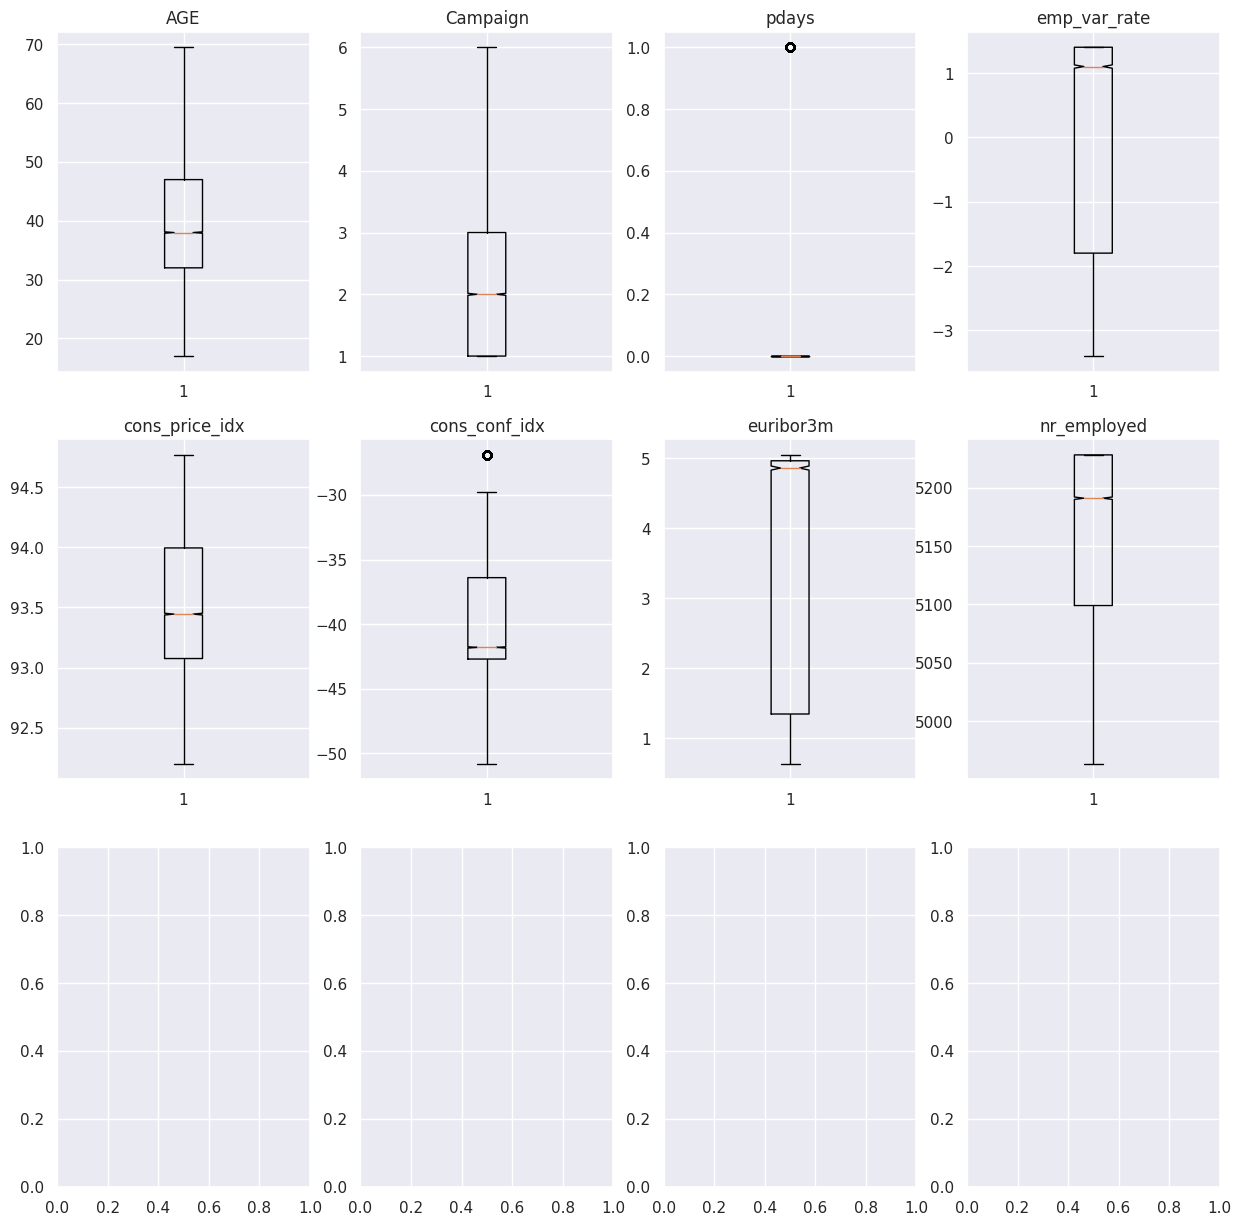

In [ ]:
fig, ax = plt.subplots(3,4,figsize=(15,15))  # 2=rows, 3=cols , figsize=figure size

ax[0, 0].boxplot(df.age, 'r') #row=0, col=0
ax[0, 1].boxplot(df.campaign, 'g') #row=0, col=1
ax[0, 2].boxplot(df.pdays, 'k') #row=1, col=1
ax[0, 3].boxplot(df.emp_var_rate, 'k') #row=1, col=2
ax[1, 0].boxplot(df.cons_price_idx, 'k') #row=1, col=2
ax[1, 1].boxplot(df.cons_conf_idx, 'k') #row=1, col=2
ax[1, 2].boxplot(df.euribor3m, 'k') #row=1, col=2
ax[1, 3].boxplot(df.nr_employed, 'k') #row=1, col=2

ax[0, 0].set_title("AGE")
ax[0, 1].set_title("Campaign")
ax[0, 2].set_title("pdays")
ax[0, 3].set_title("emp_var_rate")
ax[1, 0].set_title("cons_price_idx")
ax[1, 1].set_title("cons_conf_idx")
ax[1, 2].set_title("euribor3m")
ax[1, 3].set_title("nr_employed")
#plt.show()

# EDA

## 1. Target Variable: y

<Axes: ylabel='count'>

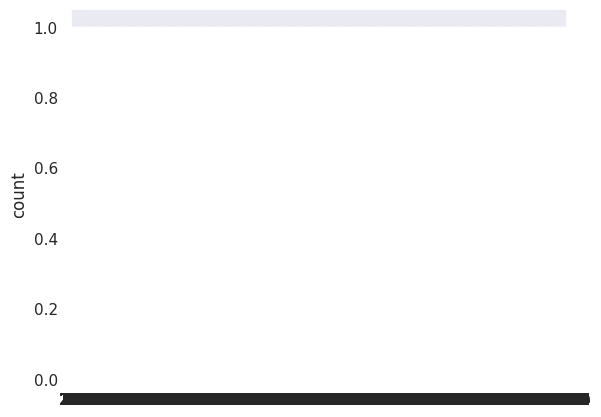

In [ ]:
sns.countplot(df.y)

In [ ]:
df["y"].value_counts()

y
0    33972
1     4257
Name: count, dtype: int64

In [ ]:
df["y"].value_counts()/41188

y
0    0.824803
1    0.103355
Name: count, dtype: float64

**Target variable is highly imbalanced.Hence, imbalanced data treatment is required.**

## 2. Numeric Features: age, duration, campaign, pdays, previous, emp_var_rate, cons_price_idx, cons_conf_idx, euribor3m, nr_employed

### a. Age

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

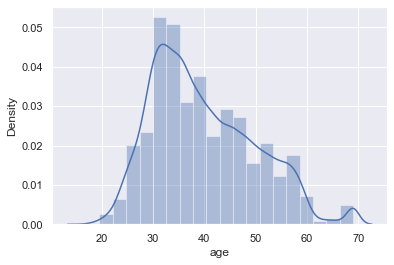

In [ ]:
sns.distplot(df.age,bins=20)

print("Age Vs Subscription Analysis")

fig = plt.figure()

g1=fig.add_subplot(1,2,1)
pivot1 =df.pivot_table(index='age', values="y", aggfunc=np.sum)
pivot1.plot(kind='bar', ax=g1)  # pass in subplot as an argument
#g1.set_xlabel('age')
#g1.set_ylabel('Total customers ')
plt.xticks(rotation=0)

g2 = fig.add_subplot(1,2,2)
pivot2 =train.pivot_table(index='age', values="y", aggfunc=np.mean)
pivot2.plot(kind='bar', ax=g2)  # pass in subplot as an argument
#g2.set_xlabel('Gender')
#g2.set_ylabel('Average Purchase Amount')
plt.xticks(rotation=0)

fig.tight_layout()
fig.set_figheight(5)
fig.set_figwidth(10)


### 3. Categorical Features: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome

###  a.Job

Text(0, 0.5, 'Frequency of Purchase')

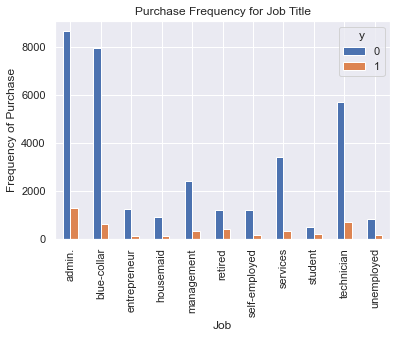

In [ ]:
%matplotlib inline
pd.crosstab(df.job,df.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign', ylabel='count'>

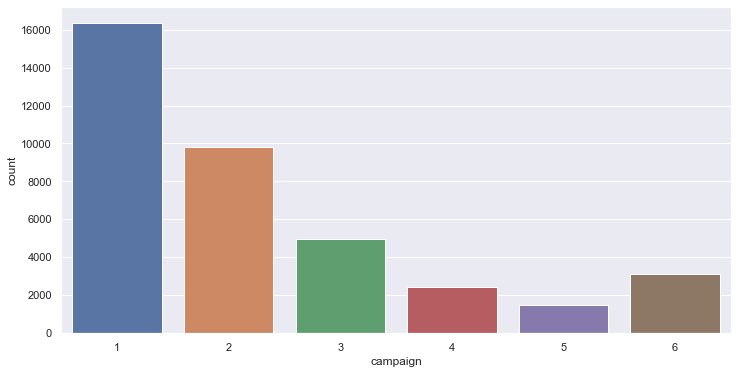

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df['campaign'])

<AxesSubplot:xlabel='job', ylabel='count'>

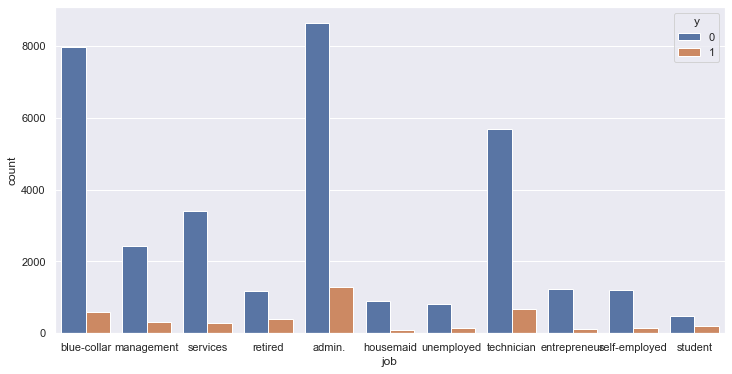

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='job',hue='y')

### Correlation between Numeric Predictors and Target variable

<AxesSubplot:>

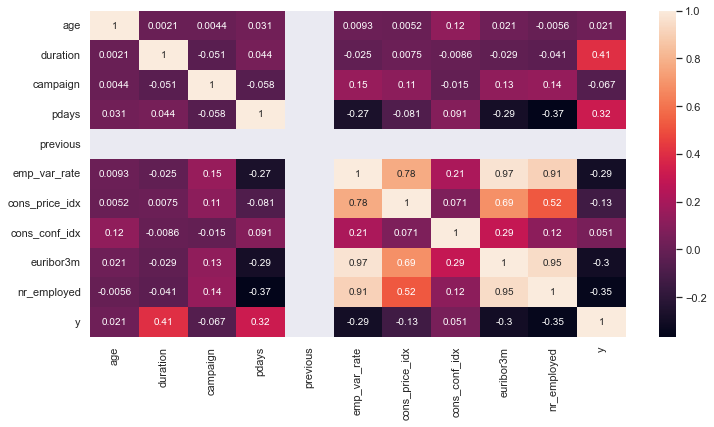

In [ ]:
#Constructing a heatmap using seaborn library to check for correlation between different numeric predictors and target variable.
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True)

In [ ]:
df.drop(labels=['duration'],axis=1,inplace=True)

# ENCODING

In [ ]:
le=LabelEncoder()
df.default=le.fit_transform(df.default)
df.contact=le.fit_transform(df.contact)
df.housing=le.fit_transform(df.housing)
df.loan=le.fit_transform(df.loan)

df=pd.get_dummies(df,drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38229 entries, 0 to 38228
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38229 non-null  int64  
 1   default                        38229 non-null  int32  
 2   housing                        38229 non-null  int32  
 3   loan                           38229 non-null  int32  
 4   contact                        38229 non-null  int32  
 5   campaign                       38229 non-null  int64  
 6   pdays                          38229 non-null  int64  
 7   previous                       38229 non-null  int64  
 8   emp_var_rate                   38229 non-null  float64
 9   cons_price_idx                 38229 non-null  float64
 10  cons_conf_idx                  38229 non-null  float64
 11  euribor3m                      38229 non-null  float64
 12  nr_employed                    38229 non-null 

In [ ]:
df.to_csv("BankProcessed.csv")

In [ ]:
df1=pd.read_csv("BankProcessed.csv")

In [ ]:
df1.drop(labels=['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38229 entries, 0 to 38228
Data columns (total 45 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38229 non-null  int64  
 1   default                        38229 non-null  int64  
 2   housing                        38229 non-null  int64  
 3   loan                           38229 non-null  int64  
 4   contact                        38229 non-null  int64  
 5   campaign                       38229 non-null  int64  
 6   pdays                          38229 non-null  int64  
 7   previous                       38229 non-null  int64  
 8   emp_var_rate                   38229 non-null  float64
 9   cons_price_idx                 38229 non-null  float64
 10  cons_conf_idx                  38229 non-null  float64
 11  euribor3m                      38229 non-null  float64
 12  nr_employed                    38229 non-null 

In [ ]:
df1.drop(labels=['emp_var_rate','euribor3m','nr_employed','cons_price_idx','cons_conf_idx'],axis=1,inplace=True)

In [ ]:
df1.drop(labels=['emp_var_rate'],axis=1,inplace=True)

In [ ]:
x=df1.drop(['y'],axis=1)   # axis=0 (rows :default) , implace=T means dropping permanently from original data
y=df1.y

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x))
x

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,0.519231,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.484412,0.615063,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.211538,0.0,1.0,0.0,0.0,0.4,1.0,0.0,0.722525,0.460251,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.423077,0.0,0.0,0.0,0.0,0.2,0.0,0.0,0.340608,0.154812,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.730769,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.811715,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.250000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.669135,0.338912,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38224,0.807692,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.882307,0.376569,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
38225,0.269231,0.0,0.0,0.0,1.0,0.2,0.0,0.0,0.698753,0.602510,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
38226,0.480769,0.0,1.0,1.0,1.0,0.4,0.0,0.0,0.698753,0.602510,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
38227,0.596154,0.0,0.0,1.0,1.0,0.2,0.0,0.0,0.089634,1.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38229 entries, 0 to 38228
Data columns (total 44 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            38229 non-null  int64  
 1   default                        38229 non-null  int64  
 2   housing                        38229 non-null  int64  
 3   loan                           38229 non-null  int64  
 4   contact                        38229 non-null  int64  
 5   campaign                       38229 non-null  int64  
 6   pdays                          38229 non-null  int64  
 7   previous                       38229 non-null  int64  
 8   cons_price_idx                 38229 non-null  float64
 9   cons_conf_idx                  38229 non-null  float64
 10  euribor3m                      38229 non-null  float64
 11  nr_employed                    38229 non-null  float64
 12  y                              38229 non-null 

In [ ]:
# VIF dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = x.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]

print(vif_data)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


    feature         VIF
0         0    9.534143
1         1    1.001388
2         2    2.184709
3         3    1.188556
4         4    5.068947
5         5    1.753220
6         6   11.760417
7         7         NaN
8         8   30.071034
9         9   14.517329
10       10   83.458437
11       11  121.095939
12       12    3.119954
13       13    1.177211
14       14    1.188968
15       15    1.338465
16       16    1.506882
17       17    1.158512
18       18    1.574001
19       19    1.158290
20       20    2.114073
21       21    1.125982
22       22    6.434746
23       23    3.946127
24       24    2.607826
25       25    1.002734
26       26    2.125528
27       27    3.587692
28       28    6.321170
29       29    1.132414
30       30    5.413068
31       31    4.558799
32       32    1.198173
33       33    7.049163
34       34    3.109799
35       35    1.484839
36       36    1.448743
37       37    2.088468
38       38    2.120403
39       39    2.036233
40       40    2

# Test Train Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=42)

### Imbalance Treatment

In [ ]:
from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,x,y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Cross Validation Scores are [0.89942454 0.90138635 0.90112477 0.90099398 0.90032701]
Average Cross Validation score :0.9006513295059146


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x_train, y_train = sm.fit_resample(x_train, y_train)
#x_test, y_test = sm.fit_resample(x_test, y_test)

# MODELS

### Logistic Regression
* Linearity of ind var
* No influential outliers
* No multicollinearity
* indep of obs
* large sample size

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_pred = lr.predict(x_test)
print("Confusion Matrix", confusion_matrix(y_train_pred,y_train))
print("Precision Score",precision_score(y_train_pred,y_train))
print(classification_report(y_train_pred,y_train))
print('---------------------------------------')
print("Confusion Matrix", confusion_matrix(y_test,y_pred))
print("Precision Score",precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
accuracy = lr.score(x_test, y_test)
print(accuracy)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Confusion Matrix [[21274  9105]
 [ 4192 16361]]
Precision Score 0.6424644624204822
              precision    recall  f1-score   support

           0       0.84      0.70      0.76     30379
           1       0.64      0.80      0.71     20553

    accuracy                           0.74     50932
   macro avg       0.74      0.75      0.74     50932
weighted avg       0.76      0.74      0.74     50932

---------------------------------------
Confusion Matrix [[7093 1413]
 [ 379  673]]
Precision Score 0.32262703739213805
              precision    recall  f1-score   support

           0       0.95      0.83      0.89      8506
           1       0.32      0.64      0.43      1052

    accuracy                           0.81      9558
   macro avg       0.64      0.74      0.66      9558
weighted avg       0.88      0.81      0.84      9558

0.8125130780498012


In [ ]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)
pca.fit(x_train)
x_train = pca.transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_train_pred = lr.predict(x_train)
y_pred = lr.predict(x_test)
print("Confusion Matrix", confusion_matrix(y_train_pred,y_train))
print("Precision Score",precision_score(y_train_pred,y_train))
print(classification_report(y_train_pred,y_train))
print('---------------------------------------')
print("Confusion Matrix", confusion_matrix(y_test,y_pred))
print("Precision Score",precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
accuracy = lr.score(x_test, y_test)
print(accuracy)

Confusion Matrix [[20664  8619]
 [ 4802 16847]]
Precision Score 0.6615487316421896
              precision    recall  f1-score   support

           0       0.81      0.71      0.75     29283
           1       0.66      0.78      0.72     21649

    accuracy                           0.74     50932
   macro avg       0.74      0.74      0.74     50932
weighted avg       0.75      0.74      0.74     50932

---------------------------------------
Confusion Matrix [[6896 1610]
 [ 361  691]]
Precision Score 0.3003042155584528
              precision    recall  f1-score   support

           0       0.95      0.81      0.87      8506
           1       0.30      0.66      0.41      1052

    accuracy                           0.79      9558
   macro avg       0.63      0.73      0.64      9558
weighted avg       0.88      0.79      0.82      9558

0.7937853107344632


### Random Forest

In [ ]:
# Baseline Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_train_pred = rf.predict(x_train)
y_pred = rf.predict(x_test)
print("Confusion Matrix", confusion_matrix(y_train_pred,y_train))
print("Precision Score",precision_score(y_train_pred,y_train))
print(classification_report(y_train_pred,y_train))
print('---------------------------------------')
print("Confusion Matrix", confusion_matrix(y_test,y_pred))
print("Precision Score",precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))

accuracy = rf.score(x_test, y_test)
print(accuracy)


Confusion Matrix [[25371   184]
 [   95 25282]]
Precision Score 0.9927746799654441
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     25555
           1       0.99      1.00      0.99     25377

    accuracy                           0.99     50932
   macro avg       0.99      0.99      0.99     50932
weighted avg       0.99      0.99      0.99     50932

---------------------------------------
Confusion Matrix [[8050  456]
 [ 745  307]]
Precision Score 0.40235910878112713
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      8506
           1       0.40      0.29      0.34      1052

    accuracy                           0.87      9558
   macro avg       0.66      0.62      0.63      9558
weighted avg       0.86      0.87      0.87      9558

0.8743460975099393


## Naive BAYES
* no multicollinearity

In [ ]:
#train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)
y_train_pred = gnb.predict(x_train)
y_pred = gnb.predict(x_test)

print("Confusion Matrix", confusion_matrix(y_train_pred,y_train))
print("Precision Score",precision_score(y_train_pred,y_train))
print(classification_report(y_train_pred,y_train))
print('---------------------------------------')
print("Confusion Matrix", confusion_matrix(y_test,y_pred))
print("Precision Score",precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))


accuracy = gnb.score(x_test, y_test)
print(accuracy)


Confusion Matrix [[16433  7491]
 [ 9033 17975]]
Precision Score 0.7058430848975104
              precision    recall  f1-score   support

           0       0.65      0.69      0.67     23924
           1       0.71      0.67      0.69     27008

    accuracy                           0.68     50932
   macro avg       0.68      0.68      0.68     50932
weighted avg       0.68      0.68      0.68     50932

---------------------------------------
Confusion Matrix [[5473 3033]
 [ 340  712]]
Precision Score 0.19012016021361816
              precision    recall  f1-score   support

           0       0.94      0.64      0.76      8506
           1       0.19      0.68      0.30      1052

    accuracy                           0.65      9558
   macro avg       0.57      0.66      0.53      9558
weighted avg       0.86      0.65      0.71      9558

0.6471019041640511


## SVM

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
model = svm.SVC(kernel='linear') # Linear Kernel
model.fit(x_train, y_train)

y_train_pred = gnb.predict(x_train)
y_pred = gnb.predict(x_test)

print("Confusion Matrix", confusion_matrix(y_train_pred,y_train))
print("Precision Score",precision_score(y_train_pred,y_train))
print(classification_report(y_train_pred,y_train))
print('---------------------------------------')
print("Confusion Matrix", confusion_matrix(y_test,y_pred))
print("Precision Score",precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))


accuracy = gnb.score(x_test, y_test)
print(accuracy)


## BOASTING

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=15000)
classifier=model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
print(accuracy)

accuracy1=model.score(x_train, y_train)
print(accuracy1)

In [ ]:
#!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(learning_rate=0.1,n_estimators=1000,use_label_encoder=False,random_state=420)
classifier=model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = model.score(x_test, y_test)
accuracy

## Discriminant Analysis Model

In [ ]:
model = LinearDiscriminantAnalysis()
model.fit(x_train, y_train)

y_train_pred = gnb.predict(x_train)
y_pred = gnb.predict(x_test)

print("Confusion Matrix", confusion_matrix(y_train_pred,y_train))
print("Precision Score",precision_score(y_train_pred,y_train))
print(classification_report(y_train_pred,y_train))
print('---------------------------------------')
print("Confusion Matrix", confusion_matrix(y_test,y_pred))
print("Precision Score",precision_score(y_test,y_pred))
print(classification_report(y_test, y_pred))


accuracy = gnb.score(x_test, y_test)
print(accuracy)

* EDA inferences
* python nb refer
* correlation Multicollinearity---VIF
* Feature selection
* SMOTE, k cross valid,imbalance
* Models :backend study assumption, classifiaction report FP low, Tuning
* Final model
* Deployment
* Report , ppt